This notebook contains maps of model outputs vs true outcomes. See `census_precinct_data.ipynb` for maps of input features.

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.errors import ShapelyDeprecationWarning
import warnings
plt.rcParams['figure.figsize'] = [12, 12]  # add more space to figures

In [2]:
vtds = gpd.read_file('geo/MI_VTDs_2020/MI_VTDs_2020.shp')
vtds = vtds.dissolve(by="GEOID20").reset_index()  # combine VTD areas that have same name
vtds = vtds.rename(columns={"GEOID20":"VTD_ID"})  # rename identifying column for simplicity
vtds["VTD_ID"] = vtds.VTD_ID.astype(str)  # convert to string
vtds = vtds[["VTD_ID","geometry"]]
vtds

,VTD_ID,geometry
0,26001001001,"POLYGON ((-83.64576 44.77049, -83.64541 44.771..."
1,26001001002,"POLYGON ((-83.76779 44.77279, -83.76777 44.774..."
2,26001001003,"POLYGON ((-83.88742 44.59538, -83.88665 44.595..."
3,26001001004,"POLYGON ((-83.40228 44.59806, -83.40025 44.598..."
4,26001001005,"POLYGON ((-83.52528 44.68394, -83.52456 44.684..."
...,...,...
4800,26165165017,"POLYGON ((-85.58029 44.33749, -85.58027 44.338..."
4801,26165165018,"POLYGON ((-85.82127 44.27858, -85.82121 44.280..."
4802,26165165019,"POLYGON ((-85.82145 44.22325, -85.82137 44.228..."
4803,26165165020,"POLYGON ((-85.82086 44.35248, -85.82082 44.360..."


In [3]:
def simple_map(data,boundary=True,variable=None,title=None):
    
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        if variable is not None:
            fig = data.plot(column=variable,legend=True)
            if title is None:
                title = variable
        elif boundary:
            fig = data.boundary.plot()
        else:
            fig = data.plot()
        if title is not None:
            plt.title(title)
        return fig

def simple_choropleth(data,variable,title=None):
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)
        # For some reason, below line prints deprecation warning for some but not all geometries
        # (for example, for community_areas but not for tracts)
        # ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0.
        data.plot(column=variable,legend=True)
        if title is None:
            title = variable
        plt.title(title)
        plt.show()

In [6]:
precincts = pd.read_csv('data/mi_matched_precinct.csv')
precincts["VTD_ID"] = precincts.VTD_ID.astype(str)  # convert to string
precincts

,NAME20,VTD_ID,total_pop,pop_density,prop_white,prop_Black,prop_Hispanic,prop_AIA,prop_Asian,prop_married,...,R_pct_vote,D_recipient_cfscore,I_recipient_cfscore,R_recipient_cfscore,D_cf_category,D_cf_label,I_cf_category,I_cf_label,R_cf_category,R_cf_label
0,10104000001,26001001001,1199.706208,0.000020,0.976484,0.001091,0.007787,0.003980,0.003651,0.586734,...,0.677225,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
1,11246000001,26001001002,888.447426,0.000014,0.974214,0.000000,0.007050,0.003035,0.004946,0.544382,...,0.685764,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
2,11932000001,26001001003,732.583185,0.000008,0.948043,0.000000,0.018285,0.024794,0.008878,0.427789,...,0.649466,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
3,13482000001,26001001004,1234.485189,0.000060,0.969429,0.010086,0.003118,0.005656,0.008460,0.521359,...,0.640000,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
4,13574000001,26001001005,746.017711,0.000030,0.958360,0.001958,0.016015,0.011473,0.000809,0.410391,...,0.725166,-1.474,NaN,1.086,-3.0,Very Liberal,NaN,NaN,3.0,Very Conservative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037,1636508000008,26163163816,2254.373896,0.000600,0.782618,0.038776,0.058316,0.017743,0.102547,0.667799,...,0.495210,-1.376,0.5325,1.018,-3.0,Very Liberal,2.0,Strong Conservative,3.0,Very Conservative
1038,1636508000009,26163163817,2412.939006,0.000807,0.858341,0.020712,0.026011,0.020645,0.079797,0.541736,...,0.471647,-1.376,0.5325,1.018,-3.0,Very Liberal,2.0,Strong Conservative,3.0,Very Conservative
1039,1636508000010,26163163818,2638.708464,0.001235,0.828207,0.003732,0.052125,0.003860,0.113106,0.753307,...,0.560597,-1.376,0.5325,1.018,-3.0,Very Liberal,2.0,Strong Conservative,3.0,Very Conservative
1040,1636508000011,26163163819,2455.000000,0.000655,0.907536,0.026884,0.000000,0.000000,0.065580,0.847747,...,0.558971,-1.376,0.5325,1.018,-3.0,Very Liberal,2.0,Strong Conservative,3.0,Very Conservative


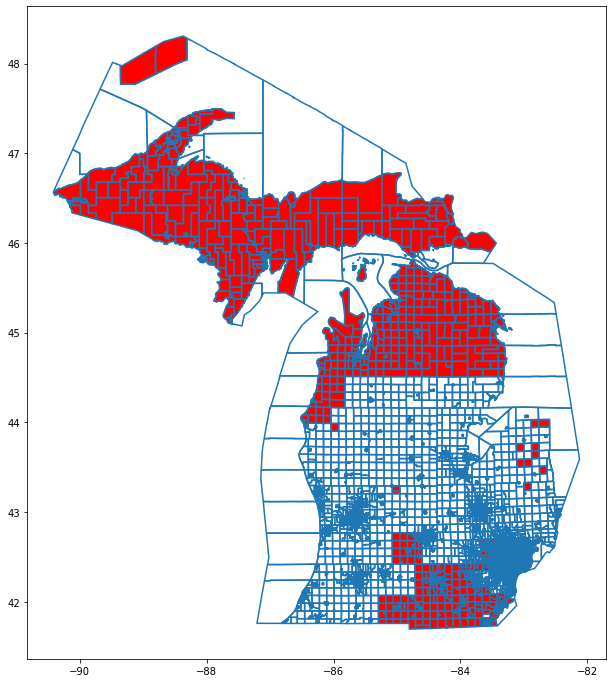

In [7]:
fig, ax = plt.subplots()
vtds.boundary.plot(ax=ax)
pd.merge(vtds,precincts,on='VTD_ID').plot(color='red',ax=ax)
plt.show()

In [12]:
dt_pred = pd.read_csv('decisiontree/decision_tree_predictions.csv')
dt_pred["VTD_ID"] = dt_pred.VTD_ID.astype(str)  # convert to string
dt_pred

,Unnamed: 0,Prediction,Actual,VTD_ID,Matches
0,0,"Republican,Close","Republican,Close",26095095003,True
1,1,"Democrat,Close","Democrat,Close",26125125476,True
2,2,"Republican,Close","Democrat,Close",26089089006,False
3,3,"Democrat,Close","Democrat,Close",26163163064,True
4,4,"Republican,Close","Republican,Close",26137137002,True
...,...,...,...,...,...
339,339,"Republican,Close","Republican,Close",26141141012,True
340,340,"Republican,Close","Republican,Close",26075075063,True
341,341,"Democrat,Close","Democrat,Close",26125125473,True
342,342,"Republican,Close","Republican,Close",26041041011,True


/Users/drewkeller/opt/anaconda3/envs/geomapping/lib/python3.10/site-packages/geopandas/plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


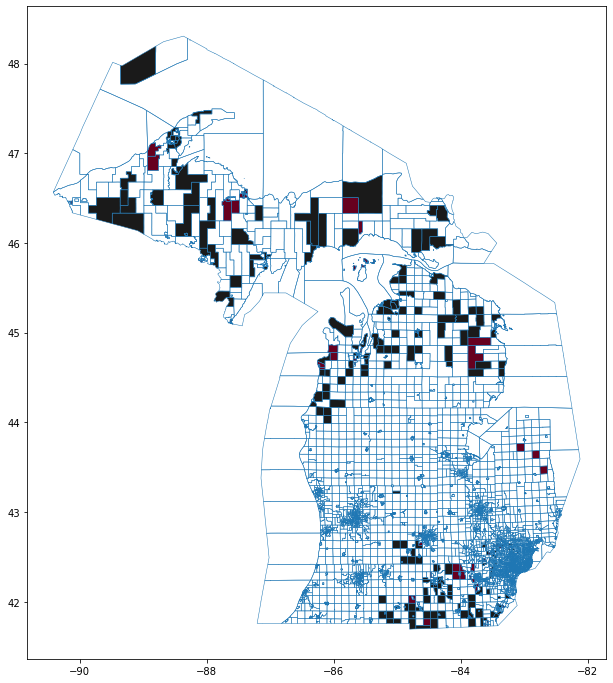

In [27]:
fig, ax = plt.subplots()
vtds.boundary.plot(linewidth=0.5,ax=ax)
pd.merge(vtds,dt_pred,on='VTD_ID').plot(column="Matches",colormap="RdGy",ax=ax)
plt.show()

In [28]:
dt_pred.Prediction.value_counts()

Republican,Close    227
Democrat,Close      117
Name: Prediction, dtype: int64

In [31]:
dt_pred["pred_vals"] = 0
dt_pred.pred_vals[dt_pred.Prediction=="Republican,Close"] = 0.5
dt_pred.pred_vals[dt_pred.Prediction=="Democrat,Close"] = -0.5
dt_pred

/var/folders/h2/1dptmntx7cqcbm48dz37csk00000gn/T/ipykernel_51896/1092712796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dt_pred.pred_vals[dt_pred.Prediction=="Republican,Close"] = 0.5


,Unnamed: 0,Prediction,Actual,VTD_ID,Matches,pred_vals
0,0,"Republican,Close","Republican,Close",26095095003,True,0.5
1,1,"Democrat,Close","Democrat,Close",26125125476,True,-0.5
2,2,"Republican,Close","Democrat,Close",26089089006,False,0.5
3,3,"Democrat,Close","Democrat,Close",26163163064,True,-0.5
4,4,"Republican,Close","Republican,Close",26137137002,True,0.5
...,...,...,...,...,...,...
339,339,"Republican,Close","Republican,Close",26141141012,True,0.5
340,340,"Republican,Close","Republican,Close",26075075063,True,0.5
341,341,"Democrat,Close","Democrat,Close",26125125473,True,-0.5
342,342,"Republican,Close","Republican,Close",26041041011,True,0.5


In [35]:
dt_pred.pred_vals.value_counts()

 0.5    227
-0.5    117
Name: pred_vals, dtype: int64

/Users/drewkeller/opt/anaconda3/envs/geomapping/lib/python3.10/site-packages/geopandas/plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


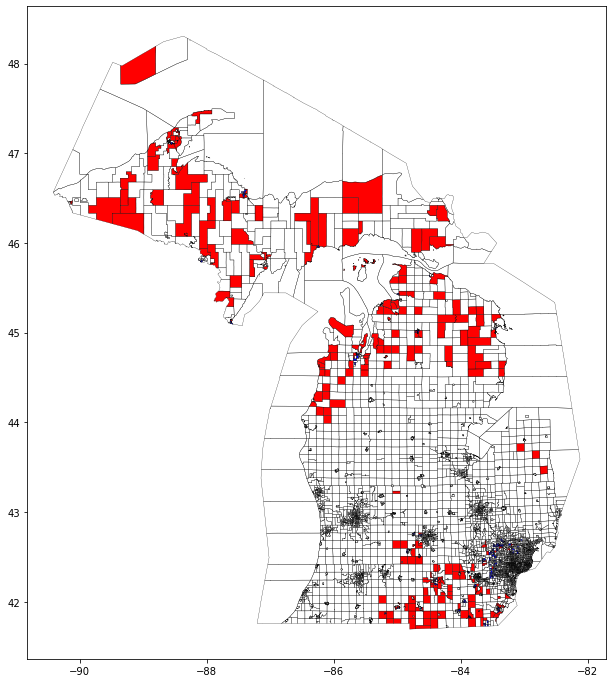

In [41]:
fig, ax = plt.subplots()
vtds.boundary.plot(linewidth=0.25,color='k',ax=ax)
pd.merge(vtds,dt_pred,on='VTD_ID').plot(column="pred_vals",colormap="bwr",ax=ax)
plt.show()

In [67]:
dt_pred.Actual.value_counts(normalize=True)  # all 


Republican,Close    0.651163
Democrat,Close      0.313953
Republican,Split    0.029070
Democrat,Split      0.005814
Name: Actual, dtype: float64

In [68]:
dt_pred.Prediction.value_counts(normalize=True)  # all 

Republican,Close    0.659884
Democrat,Close      0.340116
Name: Prediction, dtype: float64

In [69]:
dt_pred[dt_pred.Actual=="Republican,Close"].Prediction.value_counts(normalize=True)  # Actual Republican,Close

Republican,Close    0.834821
Democrat,Close      0.165179
Name: Prediction, dtype: float64

In [70]:
dt_pred[dt_pred.Actual=="Democrat,Close"].Prediction.value_counts(normalize=True)  # Actual Democrat,Close

Democrat,Close      0.731481
Republican,Close    0.268519
Name: Prediction, dtype: float64

In [71]:
dt_pred[dt_pred.Actual=="Republican,Split"].Prediction.value_counts(normalize=True)  # Actual Republican,Split

Republican,Close    1.0
Name: Prediction, dtype: float64

In [72]:
dt_pred[dt_pred.Actual=="Democrat,Split"].Prediction.value_counts(normalize=True)  # Actual Democrat,Split

Democrat,Close      0.5
Republican,Close    0.5
Name: Prediction, dtype: float64

In [42]:
rf_pred = pd.read_csv('decisiontree/random_forest_predictions.csv')
rf_pred["VTD_ID"] = dt_pred.VTD_ID.astype(str)  # convert to string
rf_pred

,Unnamed: 0,Prediction,Actual,VTD_ID,Matches
0,0,"Republican,Close","Republican,Close",26095095003,True
1,1,"Republican,Close","Democrat,Close",26125125476,False
2,2,"Republican,Close","Democrat,Close",26089089006,False
3,3,"Democrat,Close","Democrat,Close",26163163064,True
4,4,"Republican,Close","Republican,Close",26137137002,True
...,...,...,...,...,...
339,339,"Republican,Close","Republican,Close",26141141012,True
340,340,"Republican,Close","Republican,Close",26075075063,True
341,341,"Democrat,Close","Democrat,Close",26125125473,True
342,342,"Republican,Close","Republican,Close",26041041011,True


In [45]:
rf_pred.Prediction.value_counts()

Republican,Close    248
Democrat,Close       96
Name: Prediction, dtype: int64

/Users/drewkeller/opt/anaconda3/envs/geomapping/lib/python3.10/site-packages/geopandas/plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


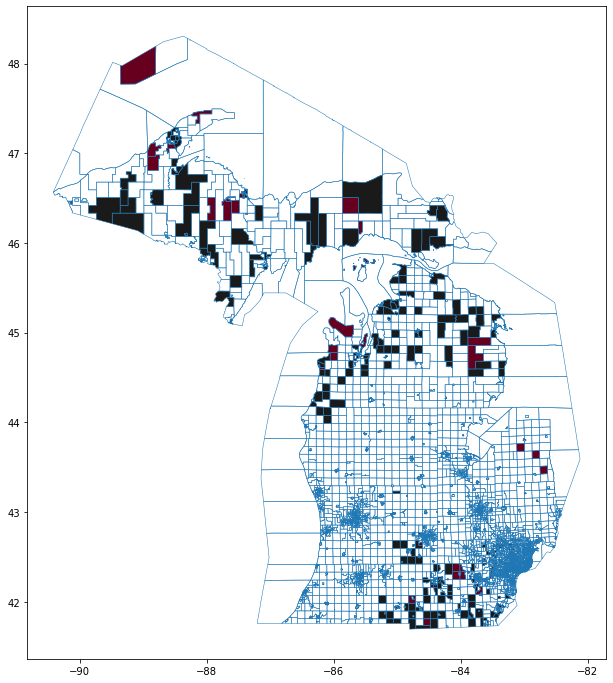

In [47]:
fig, ax = plt.subplots()
vtds.boundary.plot(linewidth=0.5,ax=ax)
pd.merge(vtds,rf_pred,on='VTD_ID').plot(column="Matches",colormap="RdGy",ax=ax)
plt.show()

In [48]:
rf_pred["pred_vals"] = 0
rf_pred.pred_vals[rf_pred.Prediction=="Republican,Close"] = 0.5
rf_pred.pred_vals[rf_pred.Prediction=="Democrat,Close"] = -0.5
rf_pred

/var/folders/h2/1dptmntx7cqcbm48dz37csk00000gn/T/ipykernel_51896/399639487.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_pred.pred_vals[rf_pred.Prediction=="Republican,Close"] = 0.5


,Unnamed: 0,Prediction,Actual,VTD_ID,Matches,pred_vals
0,0,"Republican,Close","Republican,Close",26095095003,True,0.5
1,1,"Republican,Close","Democrat,Close",26125125476,False,0.5
2,2,"Republican,Close","Democrat,Close",26089089006,False,0.5
3,3,"Democrat,Close","Democrat,Close",26163163064,True,-0.5
4,4,"Republican,Close","Republican,Close",26137137002,True,0.5
...,...,...,...,...,...,...
339,339,"Republican,Close","Republican,Close",26141141012,True,0.5
340,340,"Republican,Close","Republican,Close",26075075063,True,0.5
341,341,"Democrat,Close","Democrat,Close",26125125473,True,-0.5
342,342,"Republican,Close","Republican,Close",26041041011,True,0.5


/Users/drewkeller/opt/anaconda3/envs/geomapping/lib/python3.10/site-packages/geopandas/plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


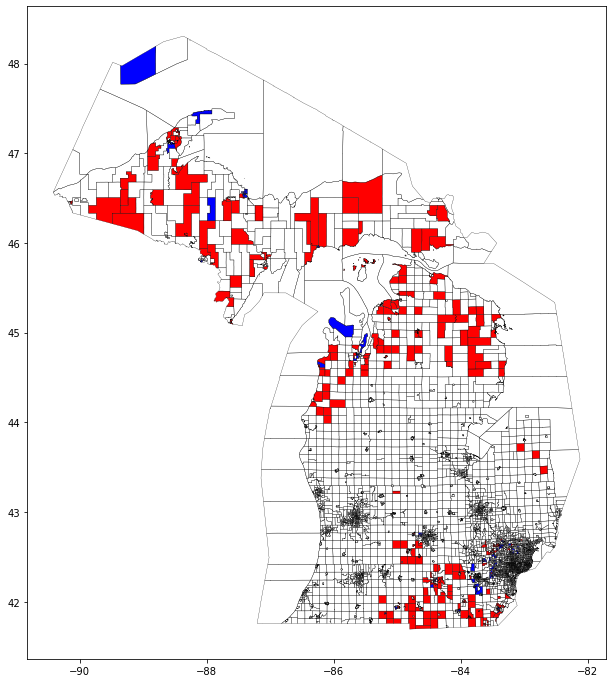

In [49]:
fig, ax = plt.subplots()
vtds.boundary.plot(linewidth=0.25,color='k',ax=ax)
pd.merge(vtds,rf_pred,on='VTD_ID').plot(column="pred_vals",colormap="bwr",ax=ax)
plt.show()

In [52]:
rf_pred["actual_vals"] = 0
rf_pred.actual_vals[rf_pred.Actual=="Republican,Close"] = 0.5
rf_pred.actual_vals[rf_pred.Actual=="Democrat,Close"] = -0.5
rf_pred

/var/folders/h2/1dptmntx7cqcbm48dz37csk00000gn/T/ipykernel_51896/3821248736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rf_pred.actual_vals[rf_pred.Actual=="Republican,Close"] = 0.5


,Unnamed: 0,Prediction,Actual,VTD_ID,Matches,pred_vals,actual_vals
0,0,"Republican,Close","Republican,Close",26095095003,True,0.5,0.5
1,1,"Republican,Close","Democrat,Close",26125125476,False,0.5,-0.5
2,2,"Republican,Close","Democrat,Close",26089089006,False,0.5,-0.5
3,3,"Democrat,Close","Democrat,Close",26163163064,True,-0.5,-0.5
4,4,"Republican,Close","Republican,Close",26137137002,True,0.5,0.5
...,...,...,...,...,...,...,...
339,339,"Republican,Close","Republican,Close",26141141012,True,0.5,0.5
340,340,"Republican,Close","Republican,Close",26075075063,True,0.5,0.5
341,341,"Democrat,Close","Democrat,Close",26125125473,True,-0.5,-0.5
342,342,"Republican,Close","Republican,Close",26041041011,True,0.5,0.5


In [59]:
rf_pred.Actual.value_counts(normalize=True)  # all 

Republican,Close    0.651163
Democrat,Close      0.313953
Republican,Split    0.029070
Democrat,Split      0.005814
Name: Actual, dtype: float64

In [58]:
rf_pred.Prediction.value_counts(normalize=True)  # all 

Republican,Close    0.72093
Democrat,Close      0.27907
Name: Prediction, dtype: float64

In [62]:
rf_pred[rf_pred.Actual=="Republican,Close"].Prediction.value_counts(normalize=True)  # Actual Republican,Close

Republican,Close    0.897321
Democrat,Close      0.102679
Name: Prediction, dtype: float64

In [63]:
rf_pred[rf_pred.Actual=="Democrat,Close"].Prediction.value_counts(normalize=True)  # Actual Democrat,Close

Democrat,Close      0.657407
Republican,Close    0.342593
Name: Prediction, dtype: float64

In [64]:
rf_pred[rf_pred.Actual=="Republican,Split"].Prediction.value_counts(normalize=True)  # Actual Republican,Split

Republican,Close    0.9
Democrat,Close      0.1
Name: Prediction, dtype: float64

In [65]:
rf_pred[rf_pred.Actual=="Democrat,Split"].Prediction.value_counts(normalize=True)  # Actual Democrat,Split

Democrat,Close      0.5
Republican,Close    0.5
Name: Prediction, dtype: float64

In [108]:
lgbm_pred = pd.read_csv('data/lgbm_test_output.csv')
lgbm_pred["VTD_ID"] = lgbm_pred["0"].astype(int).astype(str)  # convert to string
lgbm_pred = lgbm_pred.drop(columns=["0"]).rename(columns={"1":"pred_values"})
lgbm_pred

,pred_values,VTD_ID
0,0.203434,26031031021
1,0.180223,26115115003
2,-0.131896,26041041018
3,0.310064,26007007012
4,-0.006716,26115115055
...,...,...
339,0.057214,26041041011
340,-0.378365,26163163052
341,0.166180,26075075059
342,-0.080807,26091091040


<AxesSubplot:>

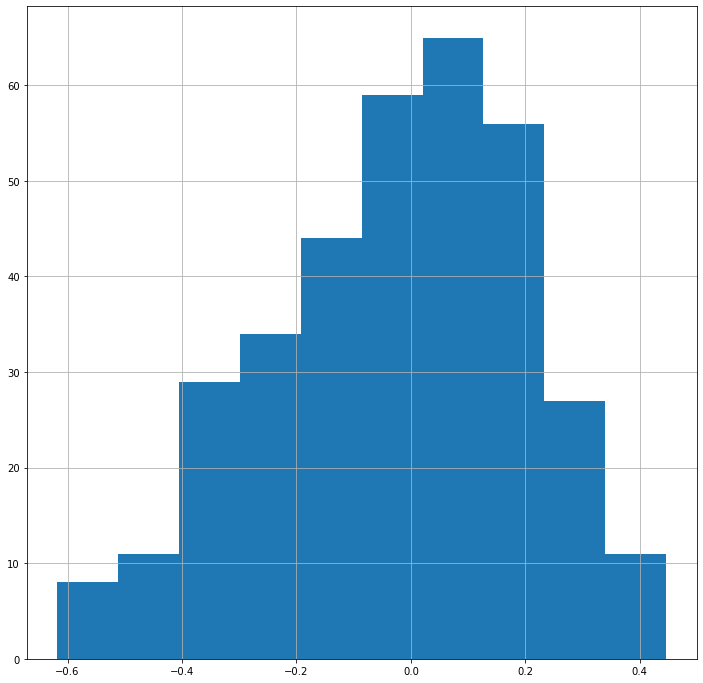

In [109]:
lgbm_pred.pred_values.hist()

/Users/drewkeller/opt/anaconda3/envs/geomapping/lib/python3.10/site-packages/geopandas/plotting.py:630: FutureWarning: 'colormap' is deprecated, please use 'cmap' instead (for consistency with matplotlib)
  warnings.warn(


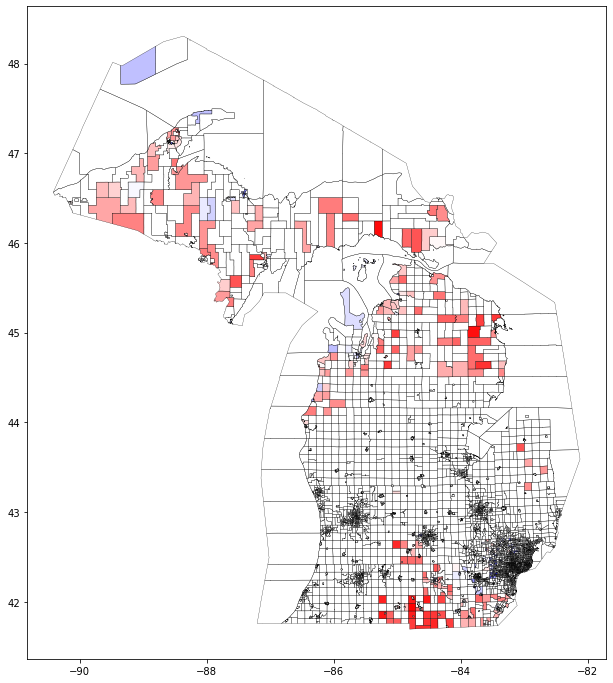

In [110]:
fig, ax = plt.subplots()
vtds.boundary.plot(linewidth=0.25,color='k',ax=ax)
pd.merge(vtds,lgbm_pred,on='VTD_ID').plot(column="pred_values",colormap="bwr",ax=ax)
plt.show()

In [111]:
all_pred = pd.read_csv('data/lgbm_all_output.csv')
all_pred["VTD_ID"] = all_pred["0"].astype(str)  # convert to string
all_pred = lgbm_pred.drop(columns=["0"]).rename(columns={"1":"pred_values"})
all_pred

ValueError: invalid literal for int() with base 10: '26001ZZZZZZ'